# Analysis of the engine’s performance with and without a supercharger

## Input Data

#### Engine parameters

In [1]:
Vs = 0.0028 #Swept Volume (m^3)
nm = 80 #Mechanical efficiency (%)
ni = 74 #Isentropic efficiency (%)
Cp = 1.005 #Specific heat capacity (J/kgK)

#### Super Charger

In [2]:
p1 = 1.013 #atmospheric pressure (bar)
T1 = 288 #atmospheric temperature (K)
pr = 1.6 #pressure ratio
g = 1.4 #adiabatic gas constant
R = 287 #real gas constant (J/kgK)

# Case 1: (At a constant engine speed)

In [3]:
N = 4000 #engine speed (rpm)
ip = 12.5 #average indicated power (Kw/m^3)
nv = 85 #Volumetric efficiency (%)

In [4]:
#Supercharger pressure output
p2 = pr*p1 #(bar)
#Engine temperature output
T21 = T1*(p2/p1)**((g-1)/g)
#supercharger temperature output
T2 = T1+((T21-T1)/(ni/100))
#piston swept volume
Vs1 = (Vs*(N/2))
#equivalent volume
Ve = (Vs1*p2*T1)/(T2*p1)
#volumetric eficiency of the super charger
nv1 = (Ve/Vs1)*100

In [5]:
#unsupercharged induced volume
Vi = Vs1*(nv/100)
#increament in the induced volume
Vii = Ve-Vi
#increament in the indicated power due to the volume of air
ipa = ip*Vii
#increament in the indicated power due to pressure of the air
ipi = ((p2-p1)*10**5*Vs1)/(60*1000)
#total increment in the unduced power
ipt = ipi+ipa

In [6]:
#increament in the brake power of the engine
bp = ipt*(nm/100)
#brake power without supercharger
bpe = ip*(nm/100)
#mass of air delivered to supercharger
ma = (p2*(Vs1/60)*10**5)/(R*T2)
#power consumed by the super charger
P = ma*Cp*(T2-T1)
#power delivered to the supercharger to run
Pd = P/(nm/100)
#net increament in the brake power
bpn = bp-Pd

## Results

In [7]:
print("Engine's indicated power without the supercharger is ",round(ip),'Kw')
print("Engines indicated power with the supercharger is ",round(ipt),'Kw')
print("Engines brake power without the supercharger is ",round(bpe),'Kw')
print("Engines brake power with the supercharger is ",round(bpn),'Kw')
print("Volumetric efficiency of the engine with the supercharger is ",round(nv1),"%")

Engine's indicated power without the supercharger is  12 Kw
Engines indicated power with the supercharger is  40 Kw
Engines brake power without the supercharger is  10 Kw
Engines brake power with the supercharger is  21 Kw
Volumetric efficiency of the engine with the supercharger is  134 %


# Case 2:(Analysis of enginees output with and without supercharger for different engines speed)

Importing the required libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the required data

In [9]:
data = pd.read_csv('Engine.csv')
data    #this line can also bevwritten as data.head(n=10)


,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw)
0,1000,70,10
1,2000,76,13
2,3000,80,16
3,4000,82,20
4,5000,85,21
5,6000,86,22
6,7000,88,24
7,8000,90,26
8,9000,91,28
9,10000,93,30


In [10]:
#Supercharger pressure output
p2 = pr*p1 #(bar)
#Engine temperature output
T21 = T1*(p2/p1)**((g-1)/g)
#supercharger temperature output
T2 = T1+((T21-T1)/(ni/100))
#piston swept volume
Vs1 = (Vs*(data['Speed (rpm)']/2))
#equivalent volume
Ve = (Vs1*p2*T1)/(T2*p1)
#volumetric eficiency of the super charger
nv1 = (Ve/Vs1)*100

In [11]:
#unsupercharged induced volume
Vi = Vs1*(data['Volumetric Efficiency (%)']/100)
#increament in the induced volume
Vii = Ve-Vi
#increament in the indicated power due to the volume of air
ipa = data['Indicated Power (Kw)']*Vii
#increament in the indicated power due to pressure of the air
ipi = ((p2-p1)*10**5*Vs1)/(60*1000)
#total increment in the unduced power
data['Total Indicated Power (kw)'] = ipi+ipa

In [12]:
#increament in the brake power of the engine
bp = data['Total Indicated Power (kw)']*(nm/100)
#brake power without supercharger
data['Brake Power without the SuperCharger (Kw)'] = data['Indicated Power (Kw)']*(nm/100)
#mass of air delivered to supercharger
ma = (p2*(Vs1/60)*10**5)/(R*T2)
#power consumed by the super charger
P = ma*Cp*(T2-T1)
#power delivered to the supercharger to run
Pd = P/(nm/100)
#net increament in the brake power
data['Net Increment in the brake power (Kw)']= bp-Pd

In [13]:
#Viewing the data
data.head(n=10)

,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw),Total Indicated Power (kw),Brake Power without the SuperCharger (Kw),Net Increment in the brake power (Kw)
0,1000,70,10,10.375257,8.0,5.608021
1,2000,76,13,23.940748,10.4,13.768230
2,3000,80,16,40.528472,12.8,24.346225
3,4000,82,20,63.889254,16.0,40.342666
4,5000,85,21,79.090096,16.8,49.811156
5,6000,86,22,97.174349,17.6,61.586374
6,7000,88,24,118.069953,19.2,75.610673
7,8000,90,26,139.412381,20.8,89.992430
8,9000,91,28,164.393630,22.4,107.285246
9,10000,93,30,186.293703,24.0,122.113120


Plotting - Indicated and Brake Power with respect to Engine Speed

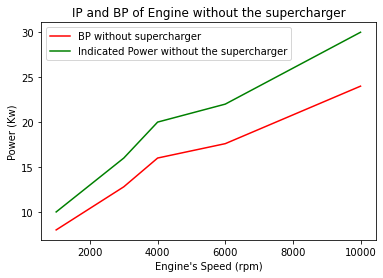

In [14]:
plt.plot(data['Speed (rpm)'], data['Brake Power without the SuperCharger (Kw)'],'r',label = 'BP without supercharger')
plt.plot(data['Speed (rpm)'], data['Indicated Power (Kw)'],'g',label = 'Indicated Power without the supercharger')

plt.title("IP and BP of Engine without the supercharger")
plt.xlabel("Engine's Speed (rpm)")
plt.ylabel("Power (Kw)")

plt.legend(loc='best')

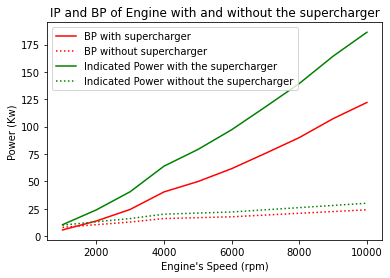

In [15]:
plt.plot(data['Speed (rpm)'],data['Net Increment in the brake power (Kw)'],'-r',label = 'BP with supercharger')
plt.plot(data['Speed (rpm)'], data['Brake Power without the SuperCharger (Kw)'],':r',label = 'BP without supercharger')
plt.plot(data['Speed (rpm)'], data['Total Indicated Power (kw)'],'-g',label = 'Indicated Power with the supercharger')
plt.plot(data['Speed (rpm)'], data['Indicated Power (Kw)'],':g',label = 'Indicated Power without the supercharger')

plt.title("IP and BP of Engine with and without the supercharger")
plt.xlabel("Engine's Speed (rpm)")
plt.ylabel("Power (Kw)")

plt.legend(loc='best')

# From the above graph we can see the difference in engine performance with and without the supercharger.